*best viewed in [nbviewer](https://nbviewer.jupyter.org/github/CambridgeSemiticsLab/BH_time_collocations/blob/master/results/notebooks/Genesis_aspect_pilot.ipynb)*

# Constructional Aspect in Genesis
## A Pilot Study
### Cody Kingham
<a href="../../docs/sponsors.md"><img height=200px width=200px align="left" src="../../docs/images/CambridgeU_BW.png"></a>

In [1]:
! echo "last updated:"; date

last updated:
Thu 14 May 2020 09:38:49 BST


# Python

Now we import the modules and data needed for the analysis.

## Time adverbials locate events on a timeline

An event, in line with Croft 2012, refers to an entire aspectual-temporal
expression, with all of the various entities that make up the expression,
including the verb lexeme, morphemes, verb arguments, adverbials, and more. 
Note that the term 'event' is used generically rather than to refer to a 
specific kind of aspectual category, following Croft 2012.

**A time adverbial serves to situate the whole or part of an event
along a metaphorical one-dimensional timeline** (Haspelmath 1997: 23-42). 
This timeline is a metaphorical extension of the spatial dimension (idem).

```
"The baby was born before her great
grandfather died." (Haspelmath 1997: 28)

         RefT: her great-grandfather died
            |
───────────────────────────>
    |
   LSit: the baby was born
```

Here the located situation `LSit` (located situation) refers to the event, 
while `RefT` (reference time) refers to the information anchored 
to the time adverbial. The positioning  between the event and the reference
time is supplied by the preposition "before". 

In the above example, the durational quality of the situation "the baby was
born" is bounded (i.e. not durative). This is due to the interaction of the
various constructions in the sentence, including the verb tense and the semantic
structure associated with the verb lexeme. 

Specifically, there are two dimensions expressed by an event such as the one in the
example. There is both a qualitative (phasal) dimension, and a temporal dimension.
Following Croft 2012, Croft 2012 (*Verbs: Aspect and Causal Structure*), these two 
dimensions can be captured as spatial metaphors by using a graph:

```
"The door is open."

   │ 
   │
   │     ______
   │    .
q  │    .
   │.....
   │
   └────────────────
           t
```

The x-axis, or *time dimension* (t), is the one-dimensional timeline referred to
by Haspelmath as a metaphorical extension of space. Its domain (input values) are
continuous, thus the time dimension can be segmented into arbitrary segments or 
spans of various size (see time units like "day", "year", "moment"). 

The y-axis, or *quality dimension* (q), models the phases unique to an event
with points along the axis. Unlike the time dimension, the input values of the
quality dimension must be a whole number (i.e. not fractional) which indicates
how many phases an event consists of. Thus, y=1 is the first phase of an event, 
y=2 is the second, and so on, with most event types being summarized with y=1 to 3. 

Where the horizontal dotted line represents the situation *before* the door was open, and 
the vertical line represents the immediate change in state. On the q-dimension, there are
therefore 2 coordinates (i.e. 'open' y=1, versus 'not open' y=2). The solid horizontal line represents
the state of the door being open. One could also add an additional point on the time dimension
to represent the position of the speaker, which would align with the open state.

### Merging Croft and Haspelmath's models

**We can combine Croft's spatial models of event structure with Haspelmath's
model of time adverbials quite easily by adding the time adverbial information
below the time dimension.**

```
"The door was open for an hour."

q
│ 
│    
│     ______
│    .       
│    .       
│.....       
│
└──────────────── t
|    |—————|    |  hours      
        |
       RefT: "for an hour"
```

This is an example of Haspelmath's "atelic extent" (1997: 120f). The reference
time of the time adverbial is now added below the time axis, and can be seen
to highlight the span of time during which the door was open.

(What about the final state of the door? This information most likely
needs to be supplied from the context. The shift to past tense here seems to imply
that the door is now closed. But that does not seem required by the semantic context.
It is possible, however, the past tense and the ending of such a state are statistically
associated—in which case we could say that the construction has a default interpretation
in which the state ends.)

## Aspect is constructional not verbal

The aspect of an event derives from a whole constructional network, 
rather than a single given construction such as the verb.

## Aspect is subjective but not completely so

Constructional aspect is often a matter of interpretation. But, closer inspection
shows that the interpretation of semantic relations might be better guided by
a closer inspection of collocational tendencies determined statistically.

As with the dotted line on the plot above (the phase before the door was opened) the
"pre-open state" of the door cannot be explicitly found in the sentence. Or, to put it 
another way, there is no construction in the sentence that directly correlates with
this state. Some constructional networks might likewise semantically imply that a state
follows an event. 

These are phases that we, as humans, know intuitively from world knowledge about
how these kinds of events unfold and result. But without any means of validating 
our intuition, we are left with a methodological problem. From the perspective of
linguistics as a science, we stand on one side of a great dividing wall between
the unseen and the seen, where the unseen is the concepts, beliefs, practices, 
and customs that lie hidden somewhere in the brain.

<img src="../../docs/figures/schemas/empirical_linguistics.svg" height="600px" width="600px">

But we are not left helpless. As seen in the schema above, cognitive links in the brain
give rise to statistical links amongst constructional patterns. The tricky part is that
patterns and concepts are, of course, not the same thing. And often intricate combinations
of patterns are woven for the purpose of pairing an idea. For instance, in English the formation
of the "perfective" meaning with present tense "have" + past participle shows how several
kinds of patterns (orthographic, lexical, verbal, and syntactic) are together and 
simultaneously linked to one idea. They are, in other words, non-compositional—an emergent
phenomenon.

*to be continued...*

## Analyzing Annotations

We have generated aspectual tags for all of the valid time adverbials in the book of 
Genesis as a pilot study. In this notebook, we load those annotations and do some 
exploratory data analysis.

<hr>

# Python

In [35]:
# standard & data science packages
import csv
import collections
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.serif'] = ['SBL Biblit']
import seaborn as sns
from bidi.algorithm import get_display # bi-directional text support for plotting

# custom packages (see /tools)
import paths
from tf_tools.load import load_tf
import stats.significance as mystats

# launch Text-Fabric with custom data
TF, API, A = load_tf(silent='deep')
A.displaySetup(condenseType='phrase')
F, E, T, L = A.api.F, A.api.E, A.api.T, A.api.L # corpus analysis methods

# load and set up project dataset
times_full = pd.read_csv(paths.main_table, sep='\t')
times_full.set_index(['node'], inplace=True)
times = times_full[~times_full.classi.str.contains('component')] # select singles

In [10]:
# import annotations
gen_annotes = pd.read_csv(paths.genesis_annotations)
gen_annotes = gen_annotes.set_index('node')

gen_annotes = gen_annotes[gen_annotes.remove == 0] # clean out remove values
gen_annotes = gen_annotes[gen_annotes.doubt == 0] # clean out annotations in doubt

print('data dimensions', gen_annotes.shape)

gen_annotes.head()

data dimensions (207, 14)


,ref,time,token,clause,TA_type,Aspect_main,Aspect_second,relation to S,doubt,missing element,remove,sentence,verse,link
node,,,,,,,,,,,,,,
1446801,Gen 2:2,יום,ב.ה.יום.ה.שׁביעי,וַיְכַ֤ל אֱלֹהִים֙ בַּיֹּ֣ום הַשְּׁבִיעִ֔י מְל...,SL,achievement,irreversible,past,0.0,0.0,0,וַיְכַ֤ל אֱלֹהִים֙ בַּיֹּ֣ום הַשְּׁבִיעִ֔י מְל...,וַיְכַ֤ל אֱלֹהִים֙ בַּיֹּ֣ום הַשְּׁבִיעִ֔י מְל...,https://shebanq.ancient-data.org/hebrew/text?b...
1446802,Gen 2:2,יום,ב.ה.יום.ה.שׁביעי,וַיִּשְׁבֹּת֙ בַּיֹּ֣ום הַשְּׁבִיעִ֔י מִכָּל־מ...,SL,achievement,reversible,past,0.0,0.0,0,וַיִּשְׁבֹּת֙ בַּיֹּ֣ום הַשְּׁבִיעִ֔י מִכָּל־מ...,וַיְכַ֤ל אֱלֹהִים֙ בַּיֹּ֣ום הַשְּׁבִיעִ֔י מְל...,https://shebanq.ancient-data.org/hebrew/text?b...
1446803,Gen 2:5,טרם,טרם,וְכֹ֣ל׀ שִׂ֣יחַ הַשָּׂדֶ֗ה טֶ֚רֶם יִֽהְיֶ֣ה בָ...,A,state,acquired,past,0.0,0.0,0,וְכֹ֣ל׀ שִׂ֣יחַ הַשָּׂדֶ֗ה טֶ֚רֶם יִֽהְיֶ֣ה בָ...,וְכֹ֣ל׀ שִׂ֣יחַ הַשָּׂדֶ֗ה טֶ֚רֶם יִֽהְיֶ֣ה בָ...,https://shebanq.ancient-data.org/hebrew/text?b...
1446804,Gen 2:5,טרם,טרם,וְכָל־עֵ֥שֶׂב הַשָּׂדֶ֖ה טֶ֣רֶם יִצְמָ֑ח,A,achievement,irreversible,past,0.0,0.0,0,וְכָל־עֵ֥שֶׂב הַשָּׂדֶ֖ה טֶ֣רֶם יִצְמָ֑ח,וְכֹ֣ל׀ שִׂ֣יחַ הַשָּׂדֶ֗ה טֶ֚רֶם יִֽהְיֶ֣ה בָ...,https://shebanq.ancient-data.org/hebrew/text?b...
1446805,Gen 2:17,יום,ב.יום.אכל.מן,כִּ֗י בְּיֹ֛ום מֹ֥ות תָּמֽוּת׃,SL,achievement,irreversible,future,0.0,0.0,0,כִּ֗י בְּיֹ֛ום אֲכָלְךָ֥ מִמֶּ֖נּוּ מֹ֥ות תָּמ...,וּמֵעֵ֗ץ הַדַּ֨עַת֙ טֹ֣וב וָרָ֔ע לֹ֥א תֹאכַ֖ל ...,https://shebanq.ancient-data.org/hebrew/text?b...


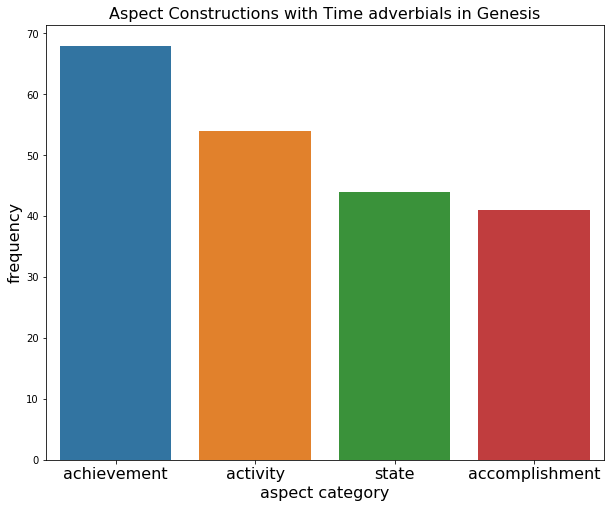

In [31]:
aspect_count = gen_annotes.Aspect_main.value_counts()

plt.figure(figsize=(10, 8))
ax = sns.barplot(x=np.arange(len(aspect_count)), y=aspect_count)
ax.set_xlabel('aspect category', size=16)
ax.set_xticklabels(aspect_count.index, size=16)
ax.set_ylabel('frequency', size=16)
ax.set_title('Aspect Constructions with Time adverbials in Genesis', size=16)
plt.show()

## Associations between TAs and Aspects

In [34]:
ta_with_aspect = pd.pivot_table(gen_annotes, index='TA_type', columns='Aspect_main', aggfunc='size').fillna(0)

ta_with_aspect

Aspect_main,accomplishment,achievement,activity,state
TA_type,,,,
SPast,1.0,0.0,0.0,0.0
A,0.0,6.0,0.0,3.0
AD,1.0,2.0,2.0,8.0
AE,1.0,1.0,35.0,8.0
P,5.0,12.0,5.0,2.0
PD,3.0,2.0,1.0,1.0
SD,0.0,1.0,1.0,6.0
SL,28.0,38.0,8.0,11.0
SP,0.0,2.0,2.0,5.0


Aspect_main,accomplishment,achievement,activity,state
TA_type,,,,
A,0.0,6.0,0.0,3.0
AD,1.0,2.0,2.0,8.0
AE,1.0,1.0,35.0,8.0
P,5.0,12.0,5.0,2.0
PD,3.0,2.0,1.0,1.0
SD,0.0,1.0,1.0,6.0
SL,28.0,38.0,8.0,11.0
SP,0.0,2.0,2.0,5.0


### ΔP 

In [54]:
dp = mystats.apply_deltaP(ta_with_aspect, 0, 1)

In [55]:
dp

Aspect_main,accomplishment,achievement,activity,state
TA_type,,,,
SPast,0.805825,-0.330097,-0.262136,-0.213592
A,-0.207071,0.353535,-0.272727,0.126263
AD,-0.129262,-0.186360,-0.114195,0.429818
AE,-0.224691,-0.391358,0.660494,-0.044444
P,0.011612,0.193989,-0.059426,-0.146175
PD,0.238571,-0.044286,-0.122143,-0.072143
SD,-0.206030,-0.211683,-0.141332,0.559045
SL,0.222854,0.201157,-0.282932,-0.141080
SP,-0.207071,-0.111111,-0.040404,0.358586


In [56]:
main_tas = dp.loc[ta_with_aspect.sum(1) > 5]

Text(0.5, 1, 'Associations between Adverbial and Aspectual Constructions')

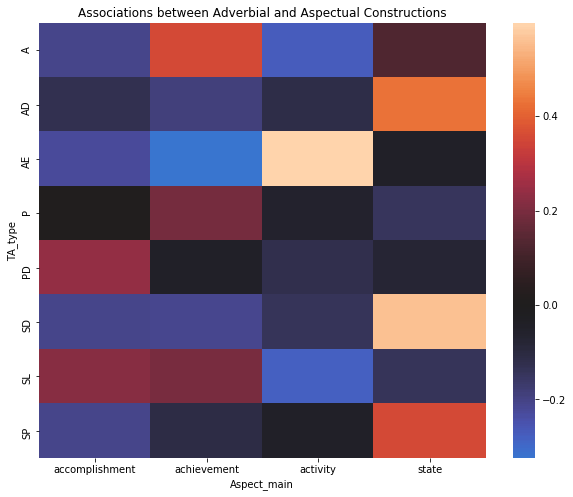

In [139]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(main_tas, robust=True, center=0)
plt.savefig(paths.figs.joinpath('Genesis_aspect/TA_with_aspect.svg'), bbox_inches='tight', format='svg')
ax.set_title('Associations between Adverbial and Aspectual Constructions')

### Looking at verb diversity

In [68]:
with_verbs = pd.concat([gen_annotes, times.loc[gen_annotes.index].verb_lex], 1)
with_verbs.tail()

,ref,time,token,clause,TA_type,Aspect_main,Aspect_second,relation to S,doubt,missing element,remove,sentence,verse,link,verb_lex
node,,,,,,,,,,,,,,,
1447112,Gen 49:27,ערב,ל.ה.ערב,וְלָעֶ֖רֶב יְחַלֵּ֥ק שָׁלָֽל׃,SL,accomplishment,incremental,future,0.0,0.0,0,וְלָעֶ֖רֶב יְחַלֵּ֥ק שָׁלָֽל׃,בִּנְיָמִין֙ זְאֵ֣ב יִטְרָ֔ף בַּבֹּ֖קֶר יֹ֣אכַ...,https://shebanq.ancient-data.org/hebrew/text?b...,חלק
1447113,Gen 50:3,יום,שׁבע.יום,וַיִּבְכּ֥וּ אֹתֹ֛ו מִצְרַ֖יִם שִׁבְעִ֥ים יֹֽום׃,AE,activity,undirected,past,0.0,0.0,0,וַיִּבְכּ֥וּ אֹתֹ֛ו מִצְרַ֖יִם שִׁבְעִ֥ים יֹֽום׃,וַיִּמְלְאוּ־לֹו֙ אַרְבָּעִ֣ים יֹ֔ום כִּ֛י כֵּ...,https://shebanq.ancient-data.org/hebrew/text?b...,בכה
1447115,Gen 50:10,יום,שׁבע.יום,וַיַּ֧עַשׂ לְאָבִ֛יו אֵ֖בֶל שִׁבְעַ֥ת יָמִֽים׃,AE,activity,undirected,past,0.0,0.0,0,וַיַּ֧עַשׂ לְאָבִ֛יו אֵ֖בֶל שִׁבְעַ֥ת יָמִֽים׃,וַיָּבֹ֜אוּ עַד־גֹּ֣רֶן הָאָטָ֗ד אֲשֶׁר֙ בְּעֵ...,https://shebanq.ancient-data.org/hebrew/text?b...,עשׂה
1447116,Gen 50:16,מות,ל.פנה.מות,אָבִ֣יךָ צִוָּ֔ה לִפְנֵ֥י מֹותֹ֖ו,A,achievement,reversible,past,0.0,0.0,0,אָבִ֣יךָ צִוָּ֔ה לִפְנֵ֥י מֹותֹ֖ו לֵאמֹֽר׃,וַיְצַוּ֕וּ אֶל־יֹוסֵ֖ף לֵאמֹ֑ר אָבִ֣יךָ צִוָּ...,https://shebanq.ancient-data.org/hebrew/text?b...,צוה
1447120,Gen 50:22,שׁנה,מאה.ו.עשׂר.שׁנה,וַיְחִ֣י יֹוסֵ֔ף מֵאָ֥ה וָעֶ֖שֶׂר שָׁנִֽים׃,AE,activity,undirected,past,0.0,0.0,0,וַיְחִ֣י יֹוסֵ֔ף מֵאָ֥ה וָעֶ֖שֶׂר שָׁנִֽים׃,וַיֵּ֤שֶׁב יֹוסֵף֙ בְּמִצְרַ֔יִם ה֖וּא וּבֵ֣ית...,https://shebanq.ancient-data.org/hebrew/text?b...,חיה


In [70]:
verb_aspect = pd.pivot_table(with_verbs, index='verb_lex', columns='Aspect_main', aggfunc='size').fillna(0)

verb_aspect

Aspect_main,accomplishment,achievement,activity,state
verb_lex,,,,
אבל,0.0,0.0,1.0,0.0
אהב,0.0,0.0,0.0,1.0
אכל,1.0,0.0,5.0,0.0
אמר,2.0,0.0,0.0,2.0
אסף,1.0,0.0,0.0,0.0
...,...,...,...,...
שׁכם,0.0,6.0,0.0,0.0
שׁלח,0.0,1.0,0.0,0.0
שׁמע,0.0,1.0,0.0,0.0


In [91]:
verb_aspect.iloc[0] > 0

Aspect_main
accomplishment    False
achievement       False
activity           True
state             False
Name: אבל, dtype: bool

Let's have a look at which verbs have multiple aspect 

In [102]:
select_verbs = []

for verb in verb_aspect.index:
    v_data = verb_aspect.loc[verb]
    n_values = v_data[v_data > 0].shape[0]
    if n_values > 1:
        select_verbs.append(verb)

In [104]:
verb_aspect.loc[select_verbs]

Aspect_main,accomplishment,achievement,activity,state
verb_lex,,,,
אכל,1.0,0.0,5.0,0.0
אמר,2.0,0.0,0.0,2.0
בוא,4.0,6.0,0.0,0.0
היה,8.0,11.0,2.0,9.0
חיה,0.0,0.0,17.0,1.0
חלל,0.0,1.0,1.0,0.0
חלק,1.0,1.0,0.0,0.0
עבר,1.0,0.0,1.0,0.0
ענה,0.0,1.0,1.0,0.0


In [127]:
eating = with_verbs[with_verbs.verb_lex == 'אכל']

eating[['ref', 'token', 'sentence', 'TA_type', 'Aspect_main', 'Aspect_second']]

,ref,token,sentence,TA_type,Aspect_main,Aspect_second
node,,,,,,
1446807,Gen 3:14,כל.יום.חיים,וְעָפָ֥ר תֹּאכַ֖ל כָּל־יְמֵ֥י חַיֶּֽיךָ׃,AE,activity,undirected
1446808,Gen 3:17,כל.יום.חיים,בְּעִצָּבֹון֙ תֹּֽאכֲלֶ֔נָּה כֹּ֖ל יְמֵ֥י חַיּ...,AE,activity,undirected
1447013,Gen 31:40,ב.ה.יום,בַיֹּ֛ום אֲכָלַ֥נִי חֹ֖רֶב וְקֶ֣רַח בַּלָּ֑יְלָה,SL,activity,undirected
1447029,Gen 32:33,עד.ה.יום.ה.זה,עַל־כֵּ֡ן לֹֽא־יֹאכְל֨וּ בְנֵֽי־יִשְׂרָאֵ֜ל אֶ...,AD,activity,undirected
1447082,Gen 43:16,ב.ה.צהרים,כִּ֥י אִתִּ֛י יֹאכְל֥וּ הָאֲנָשִׁ֖ים בַּֽצָּהֳ...,SL,activity,directed
1447111,Gen 49:27,ב.ה.בקר,בַּבֹּ֖קֶר יֹ֣אכַל עַ֑ד,SL,accomplishment,incremental


In [119]:
show_table = []
for eat in eating.index:
    sentence = L.u(eat,'sentence')[0]
    show_table.append((eat, sentence))

In [122]:
A.table(show_table, condenseType='sentence')

n,p,timephrase,sentence
1,Genesis 3:14,כָּל־יְמֵ֥י חַיֶּֽיךָ׃,וְעָפָ֥ר תֹּאכַ֖ל כָּל־יְמֵ֥י חַיֶּֽיךָ׃
2,Genesis 3:17,כֹּ֖ל יְמֵ֥י חַיֶּֽיךָ׃,בְּעִצָּבֹון֙ תֹּֽאכֲלֶ֔נָּה כֹּ֖ל יְמֵ֥י חַיֶּֽיךָ׃
3,Genesis 31:40,בַיֹּ֛ום,בַיֹּ֛ום אֲכָלַ֥נִי חֹ֖רֶב וְקֶ֣רַח בַּלָּ֑יְלָה
4,Genesis 32:33,עַ֖ד הַיֹּ֣ום הַזֶּ֑ה,עַל־כֵּ֡ן לֹֽא־יֹאכְל֨וּ בְנֵֽי־יִשְׂרָאֵ֜ל אֶת־גִּ֣יד הַנָּשֶׁ֗ה אֲשֶׁר֙ עַל־כַּ֣ף הַיָּרֵ֔ךְ עַ֖ד הַיֹּ֣ום הַזֶּ֑ה
5,Genesis 43:16,בַּֽצָּהֳרָֽיִם׃,כִּ֥י אִתִּ֛י יֹאכְל֥וּ הָאֲנָשִׁ֖ים בַּֽצָּהֳרָֽיִם׃
6,Genesis 49:27,בַּבֹּ֖קֶר,בַּבֹּ֖קֶר יֹ֣אכַל עַ֑ד


In [129]:
cross = with_verbs[with_verbs.verb_lex == 'עבר']

cross[['ref', 'token', 'sentence', 'TA_type', 'Aspect_main', 'Aspect_second']]

,ref,token,sentence,TA_type,Aspect_main,Aspect_second
node,,,,,,
1446911,Gen 18:5,אחר,אַחַ֣ר תַּעֲבֹ֔רוּ,P,activity,directed
1447002,Gen 30:32,ה.יום,אֶֽעֱבֹ֨ר בְּכָל־צֹֽאנְךָ֜ הַיֹּ֗ום,SL,accomplishment,incremental


In [132]:
show_table = []
for crossing in cross.index:
    sentence = L.u(crossing,'sentence')[0]
    show_table.append((crossing, sentence))

In [133]:
A.table(show_table, condenseType='sentence')

n,p,timephrase,sentence
1,Genesis 18:5,אַחַ֣ר,אַחַ֣ר תַּעֲבֹ֔רוּ
2,Genesis 30:32,הַיֹּ֗ום,אֶֽעֱבֹ֨ר בְּכָל־צֹֽאנְךָ֜ הַיֹּ֗ום
